In [13]:
import pandas as pd
import numpy as np
import numpy.random
import pandas as pd
from astropy.convolution import convolve
import matplotlib.pyplot as plt
from astropy.convolution.kernels import Gaussian2DKernel
import scipy.ndimage as spnd
from matplotlib.colors import LogNorm
from sklearn import preprocessing
import matplotlib as mpl
#from mpl_toolkits.basemap import cm
from matplotlib import colors, ticker
#from mpl_toolkits.basemap import Basemap

%matplotlib inline
#load in whichever bucketed file you want to visualize. To generate more plots, you just need to change the csv and 
#the pollutant in the z = df['bus_diff_PM2.5'] line
df = pd.read_csv('./bus_mxcity1-0.csv')
x = df['x_bucket']
y = df['y_bucket']
z = df['bus_diff_PM2.5']*-100
z.describe()

count    65784.000000
mean        25.873848
std          0.897637
min         14.965171
25%         25.919614
50%         26.123349
75%         26.192444
max         30.507927
Name: bus_diff_PM2.5, dtype: float64

In [3]:
heatmap, xedges, yedges = np.histogram2d(x, y, bins=500, weights=z)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]

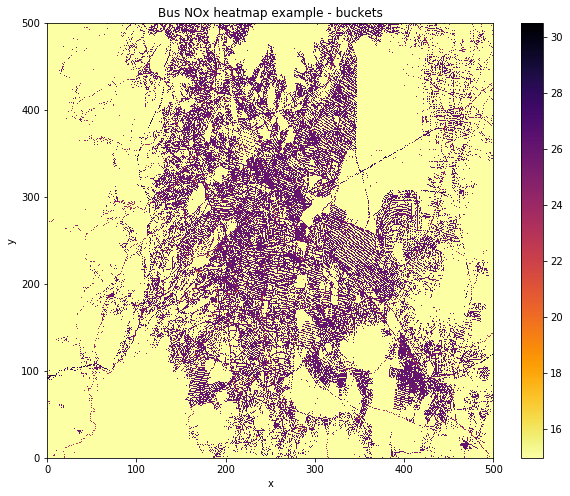

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus PM2.5 heatmap example - buckets')
plt.ylabel('y')
plt.xlabel('x')

plt.pcolor(heatmap, cmap='inferno_r', vmin=min(z), vmax=max(z))
plt.colorbar()
plt.show()

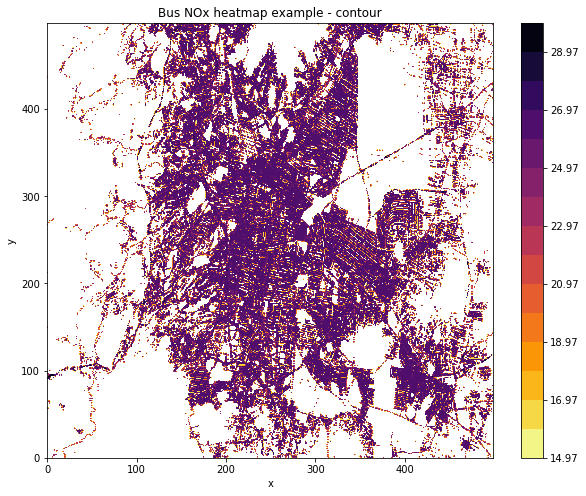

In [5]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus PM2.5 heatmap example - contour')
plt.ylabel('y')
plt.xlabel('x')

data_range = np.arange(min(z), max(z))
color_levels = data_range



plt.contourf(heatmap, color_levels, cmap='inferno_r')
plt.colorbar()
#cbar.set_label('amount')
plt.show()

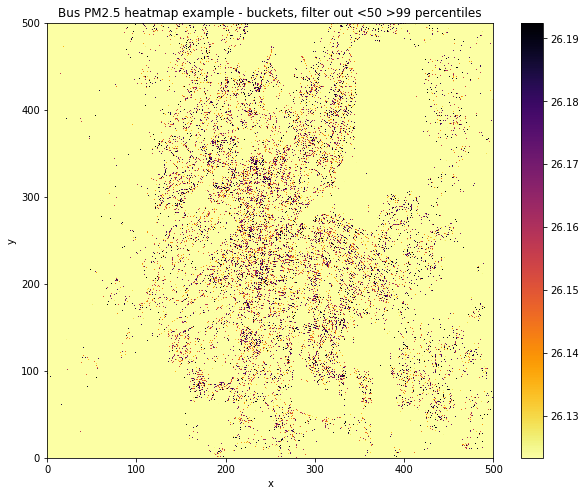

In [19]:
filtered_idx = np.where((z > np.percentile(z,50)) & (z < np.percentile(z, 75)))[0]
filtered_x = x[filtered_idx]
filtered_y = y[filtered_idx]
filtered_z = z[filtered_idx]

heatmap, xedges, yedges = np.histogram2d(filtered_x, filtered_y, bins=500, weights=filtered_z)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus PM2.5 heatmap example - buckets, filter out <50 >99 percentiles')
plt.ylabel('y')
plt.xlabel('x')
plt.pcolor(heatmap, cmap='inferno_r', vmin=min(filtered_z), vmax=max(filtered_z))
#plt.imshow(convolve(heatmap, Gaussian2DKernel(stddev=2)), extent=extent, cmap='inferno_r', norm=LogNorm(vmin=min(z)+0.00001, vmax=max(z)))
plt.colorbar()
plt.show()

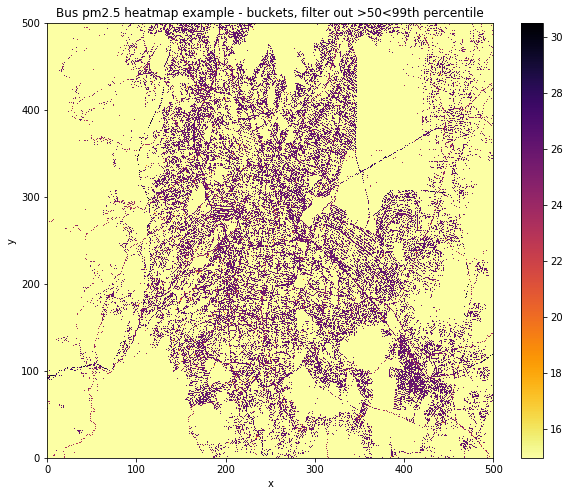

In [20]:
filtered_idx = np.where((z < np.percentile(z,50)) | (z > np.percentile(z, 75)))[0]
filtered_x = x[filtered_idx]
filtered_y = y[filtered_idx]
filtered_z = z[filtered_idx]

heatmap, xedges, yedges = np.histogram2d(filtered_x, filtered_y, bins=500, weights=filtered_z)
extent = [yedges[0], yedges[-1], xedges[0], xedges[-1]]
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([1,1,1,1])
plt.clf()
plt.title('Bus pm2.5 heatmap example - buckets, filter out >50<99th percentile')
plt.ylabel('y')
plt.xlabel('x')

plt.pcolor(heatmap, cmap='inferno_r', vmin=min(filtered_z), vmax=max(filtered_z))
plt.colorbar()
plt.show()